# Machine Learning: Classification

We will continue to build our code base from last week here. At the start of class, run the below cells to get all the functions we developed last week ready for use today!

Import libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.spatial.distance as sp
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

Toy data:

In [2]:
# List the names of the films for plotting purposes

films = ['Into the Spider Verse',       # Film 1
         'Avengers: Endgame',           # Film 2
         'Spider-Man: Homecoming',      # Film 3
         'The Greatest Showman']        # Film 4

# Input scores for each film for each user (out of 5). Missing data is indicated with a 0

data = np.array([[4.,4.,1.,3.],  # Micah 
                 [5.,4.,2.,1.],  # Jaycee 
                 [2.,2.,4.,3.],  # Seleste 
                 [2.,1.,3.,5.],  # Emeke 
                 [5.,0.,0.,2.],  # Carlette 
                 [4.,2.,2.,4.],  # Others!
                 [4.,5.,3.,2.],  #  
                 [4.,4.,0.,0.],  #  
                 [3.,5.,1.,2.],  #  
                 [0.,2.,5.,4.],  #  
                 [0.,1.,3.,5.],  #  
                 [5.,5.,3.,0.],  #  
                 [3.,2.,2.,3.],  #  
                 [5.,4.,4.,4.],  #  
                 [5.,5.,0.,0.],  #  
                 [1.,0.,0.,5.],  #  
                 [4.,4.,2.,1.],  #  
                 [4.,4.,0.,3.]]) #  

Our data:

In [3]:
our_films = ['Black Panther',  # film 0
             'Zootopia',  # film 1
             'Inside Out',  # film 2
             'The Incredibles',  # film 3
             'Lion King',  # film 4
             'Toy Story',  # film 5
             'Parasite',  # film 6
             'Chicken Little',  # film 7
             'Inception',  # film 8
             'Avatar'   # film 9
                     ]

people = ['person0',  # Jenny
          'person1',  # Jeremiah
          'person2',  # Joey
          'person3',  # Daud
          'person4',  # Brandon
          'person5',  # Tay
          'person6',  # Seila
          'person7',  # Mylinh
          'person8',  # Ivan
          'person9',  # Celina
          'person10', # Kenny
          'person11', # Andy
          'person12'  # Nora
         ]




our_data = np.array([[3,4,3,0,4,0,0,0,0,0],  # person0 - Jenny
                     [5,4,5,5,3,5,0,0,5,1],  # person1 - Jeremiah
                     [4,1,2,2,3,3,0,5,4,2],  # person2 - Joey
                     [5,0,0,0,0,0,5,0,0,5],  # person3 - Daud
                     [4,2,0,5,5,3,0,5,0,0],  # person4 - Brandon
                     [5,2,4,4,5,5,3,4,5,5],  # person5 - Tay
                     [5,3,0,3,2,4,4,0,0,0],  # person6 - Seila
                     [1,0,0,0,0,0,0,0,0,0],  # person7 - Mylinh
                     [4,0,0,5,5,5,0,5,4,2],  # person8 - Ivan
                     [4,5,4,5,4,5,5,2,0,3],  # person9 - Celina
                     [3,3,3,4,0,0,4,0,0,0],  # person10 - Kenny
                     [0,3,2,0,0,3,4,0,0,5],  # person11 - Andy
                     [5,0,2,3,4,1,5,2,4,2]]) # person12 - Nora

Functions from last week:

In [4]:
def movie_distance(x,compare):
    # computes the distance between someone "x" who scores each movie and all the people stored in a comparison
    # table "compare"
    
    distances = np.zeros(len(compare)) # create a list where we will save the distance between user x and each person
    for i in np.arange(len(compare)): # for each person in the compare chart
        distances[i] = sp.cosine(x,compare[i,:]) # calculate the distance between person x and the current person
    return distances
    
def k_nearest(x,compare,k):
    # Locate the k members of the dataset who are most similar to a given user "x"
    distances = movie_distance(x,compare)
    return distances.argsort()[:k]
    
def movie_prediction(new_person,compare,which_movie,k):
    # predicts the score "new_person" would give to the movie corresponding with column "which_movie"
    # based upon comparing them to the people in "compare" using the k-NN algorithm with k comparisons.
    
    # calculate the k most similar people to the new person
    nearest_folks = k_nearest(new_person,compare,k)
    
    # gather the scores the nearby people give to the movie in question
    nearest_folks_scores = compare[nearest_folks,which_movie]
    
    # the line below eliminates the scores of your neighbors who have also not seen the movie
    nearest_folks_scores = nearest_folks_scores[nearest_folks_scores != 0]
    
    # calculate the average of the remaining scores
    return np.mean(nearest_folks_scores)

## Feature Space

In addition to making recommendations based on the preferences of other users, we can also try to identify shared traits of films in order to guess which ones you might enjoy. Recall the housing project. Each house possessed a number of features. One could think about looking at houses that have similar features in order to find grouping! We will do the same thing with our movies here. Let's start by looking at our toy data:

### Toy Data

In [5]:
feature_list = ['Action', # Feature 1
               'Romance', # Feature 2
                'Length', # Feature 3
             'Superhero', # Feature 4
                  'Year'] # Feature 5

# Each row will correspond to a feature and each column will correspond to a film

features = np.array([[   4.,    5.,    2.,    1.],       # action score (out of 5)
                     [   2.,    1.,    4.,    3.],       # romance score (out of 5)
                     [ 152.,  126.,  102.,  103.],       # Length (minutes)
                     [   1.,    1.,    0.,    0.],       # Superhero
                     [2008., 2008., 1942., 1952.]        # Year
                     ])

# define axis limits for each variable
axis_limits = np.array([[0,6],
                        [0,6],
                        [100,160],
                        [-1,2],
                        [1940,2010]
                       ])

Observe that some variables have a much wider range of values than others. In this case, it is good to "normalize" the data by dividing them each by the mean! This means we subtract the mean of each variable and divide by the standard deviation:

$$\text{Normalized X} = \frac{X-\bar{X}}{\sigma_X}
$$

You may have also seen this called the "z-score". If we run the cell below we will successfully normalize our toy feature data.

In [6]:
s = np.shape(features)
normalized_features = features

for i in np.arange(0,s[0]):
    normalized_features[i,:] = (normalized_features[i,:]-features[i,:].mean())/features[i,:].std()

You can plot these variables in 2D with the code below:

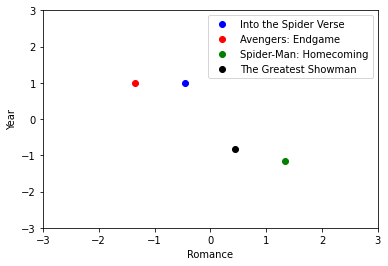

In [7]:
a = 1 # feature on x-axis
b = 4 # feature on y-axis

fig1 = plt.figure()
plt.plot(normalized_features[a,0],normalized_features[b,0],'bo')
plt.plot(normalized_features[a,1],normalized_features[b,1],'ro')
plt.plot(normalized_features[a,2],normalized_features[b,2],'go')
plt.plot(normalized_features[a,3],normalized_features[b,3],'ko')
plt.legend(films)
plt.xlabel(feature_list[a])
plt.ylabel(feature_list[b])
plt.axis([-3,3,-3,3])
plt.show()

Or in 3D with this code:

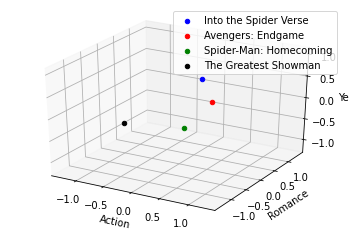

In [8]:
x = 0 # feature on x-axis
y = 1 # feature on y-axis
z = 4 # feature on z-axis

fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(normalized_features[x,0], normalized_features[y,0], normalized_features[z,0],c='b')
ax.scatter(normalized_features[x,1], normalized_features[y,1], normalized_features[z,1],c='r')
ax.scatter(normalized_features[x,2], normalized_features[y,2], normalized_features[z,2],c='g')
ax.scatter(normalized_features[x,3], normalized_features[y,3], normalized_features[z,3],c='k')
ax.legend(films)
ax.set_xlabel(feature_list[x])
ax.set_ylabel(feature_list[y])
ax.set_zlabel(feature_list[z]) #Year
plt.show()

We would like to calculate the distance between each of the toy movies and each other film (in feature space - using *all the features*!). Use the cell below this one to work on your distance calculations.

In [9]:
#heres an attempt
# def filmfeatdist(film1, film2):
film1 = 1
film2 = 2

distance = ((normalized_features[0, film1]-normalized_features[0, film2])**2. + (normalized_features[1, film1]-normalized_features[1, film2])**2.)**(1./2.)

print(distance)



3.286335345030997


We can use what we know about distance and k-NN to use this feature data in our movie recommendation approach! First, we need to write a k-NN algorithm to find the k movies most similar to a chosen test movie.

In [43]:
def feature_distance(x,compare):
    # calculates the distances in feature space between a movie with features "x" and a list of movies stored in "compare"
    
    s = np.shape(compare) # find how many films we are comparing with
    distances = np.zeros(s[1]) # make a list where we will put the distances
    
    for i in np.arange(s[1]): # for every film in the comparison list...
        distances[i] = np.sqrt(np.sum((x-compare[:,i])**2)) # calculate the distance and save it
    return distances

def k_nearest_features(x,compare,k):
    # finds the k nearest movies in feature space to the movie with features "x" (compared to a list "compare")
    distances = feature_distance(x,compare) # calculate the distances
    return distances.argsort()[:k] # indicate which ones are the smallest

In [11]:
k_nearest_features(normalized_features[:,1],normalized_features,4)   #Tests algorithm for toy data

array([1, 0, 3, 2], dtype=int32)

Now we can use this information to make recommendations! Imagine we have a test movie that you haven't seen. We could find how similar it is to movies that you have seen and use that to predict what you will think of it! We'd simply need to find the distance between the mystery movie and the k nearest movies to it (that you have seen). We'd guess your score would be the average of those movies. Complete the function below to complete this recommendation engine:

In [12]:
def movie_prediction_feature(new_film,compare,ratings_for_compare,k):
    # predicts the score given to a movie with the features stored in "new_film" trained on the features stored in
    # "compare" and the individual's scores for those movies (in "ratings_for_compare"). Uses k-NN with k a superparameter
    # indicating the number of movies it will use to make its guess. It ignores movies the user has not seen (score 0).
    
    # eliminate the movies that you haven't seen from the list
    revised_compare = compare[:,ratings_for_compare != 0]
    revised_ratings = ratings_for_compare[ratings_for_compare != 0]
    
    # compute the k most similar movies to the new movie
    nearest_films = k_nearest_features(new_film, revised_compare, k)
    
    # calculate the mean of the scores given to the nearby films by the person in question
    return np.mean(revised_ratings[k])

You can test that it works by using the toy data:

In [13]:
which_movie = 1
which_person = 1
k = 2

predict = movie_prediction_feature(normalized_features[:,which_movie], normalized_features, data[which_person,:],k)

print(predict)

2.0


## Our Data

You'll now do some experiments with feature space and our data!

In [14]:
our_feature_list = ['Animated', # feature 0
    'Box Office', # feature 1
    'Budget', # feature 2
    'Soundtrack', # feature 3
    'Awards', # feature 4
    'Media company', # feature 5
    'Rotten Tomatoes' # feature 6
]


# each column is a film and each row is a feature!
our_features = np.array([[0.,1.,1.,1.,1.,1.,0.,1.,0.,1.], # feature0 - animated or not
[1344.,1024.,857.6,633.,968.5,1073.,266.,314.4,829.9,2790.], # feature1 - box office earnings in millions
[200.,150.,175.,92.,45.,30.,11.,60.,160.,237.], # feature2 - budget in millions
[96.,92.,88.,94.,94.,91.,91.,60.,96.,92.], # feature3 - soundtrack rating (according to Google users)
[91.,24.,48.,40.,37.,17.,183.,4.,101.,73.], # feature4 - number of awards won
[0.,2.,1.,1.,2.,1.,3.,2.,3.,3.], # feature5 - production media company. Marvel - 0, Pixar - 1, Disney - 2, other - 3)
[96.,98.,98.,97.,93.,100.,99.,37.,87.,82.]]) # feature6 - Rotten Tomatoes score (in percent)

# normalize our features
s = np.shape(our_features)
our_normalized_features = our_features

for i in np.arange(0,s[0]):
    our_normalized_features[i,:] = (our_normalized_features[i,:]-our_features[i,:].mean())/our_features[i,:].std()

We can plot these in 2D:

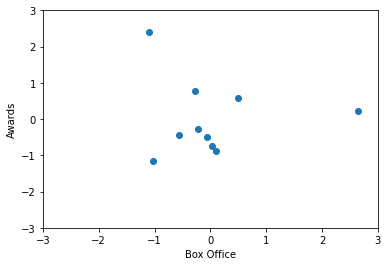

In [15]:
a = 1 # feature on x-axis
b = 4 # feature on y-axis

fig1 = plt.figure()
plt.plot(our_normalized_features[a,:],our_normalized_features[b,:],'o')
plt.xlabel(our_feature_list[a])
plt.ylabel(our_feature_list[b])
plt.axis([-3,3,-3,3])
plt.show()

and in 3D:

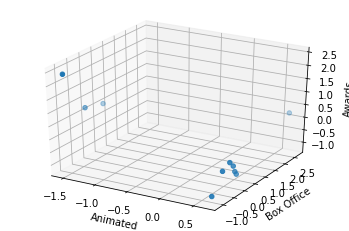

In [16]:
x = 0 # feature on x-axis
y = 1 # feature on y-axis
z = 4 # feature on z-axis

fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(our_normalized_features[x,:], our_normalized_features[y,:], our_normalized_features[z,:])
ax.set_xlabel(our_feature_list[x])
ax.set_ylabel(our_feature_list[y])
ax.set_zlabel(our_feature_list[z])
plt.show()

Try looking at a variety of these plots and seeing if you can find some patterns. Be sure to record your observations in your worksheet.

Pick one of our movies. Find the three movies most similar to it, using the `k_nearest_features` algorithm. Record your results in the worksheet and markdown cell below!

Once you are convinced your code is working, use the function `movie_prediction_feature` to predict the scores you would give to every movie that you haven't seen and record your results in the worksheet. How does this differ from the predictions done in "user space"?

We could also use the exact ideas from our regression module to construct movie score predictions, though we won't work on this. That is, we could train a regression model to predict the score you would give a movie based upon its features.

## k-Means

In our investigation of class movie data, we have plotted the data in 2D and 3D with various variables and looked for groups of similar behavior. There is actually an algorithm for identifying clusters of data. It is called k-means.

### Ancient Coins

Suppose a group of archaeologists are studying an ancient city. They find a collection of coins. Each coin is dirty and damaged. As they collect them, they suspect that there are only a few different types of coin. They measure the diameter and thickness of each coin and would like to use these features to separate the coins into groups.

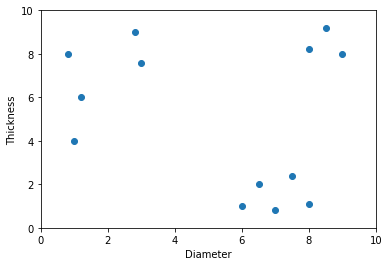

In [17]:
x = np.array([[1.,1.2,0.8,2.8,3.,6.,7.,8.,6.5,7.5,8.,8.5,9.],
            [4.,6.,8.,9.,7.6,1.,0.8,1.1,2.,2.4,8.2,9.2,8.]]) #first array is diameter, second array is thickness

plt.figure()
plt.plot(x[0,:],x[1,:],'o')
plt.axis([0,10,0,10])
plt.xlabel('Diameter')
plt.ylabel('Thickness')
plt.show()

We want to separate these points into k different groups or clusters. k is a superparameter, like in the k-NN method. We decide ahead of time how many groups we want there to be. In this case, it looks like k = 3 would be a good choice. We select a starting guess for k = 3 different "centers" of clusters. Even if we make a random choice, the algorithm will work.

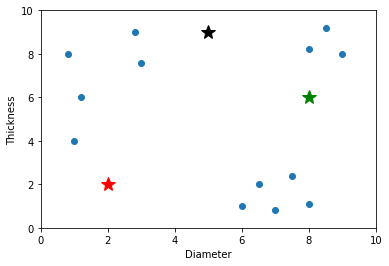

In [18]:
c = np.array([[2.,8.,5.],[2.,6.,9.]])

plt.figure()
plt.plot(x[0,:],x[1,:],'o')
plt.plot(c[0,0],c[1,0],'r*',markersize=15)
plt.plot(c[0,1],c[1,1],'g*',markersize=15)
plt.plot(c[0,2],c[1,2],'k*',markersize=15)
plt.axis([0,10,0,10])
plt.xlabel('Diameter')
plt.ylabel('Thickness')
plt.show()

We measure the distance between each point and each center. Whichever center it is closest to, we assign to that color:

In [51]:
def assign_to_groups(points,centers):
    # calculates the distance between each point in "points" and each center in "centers" 
    # and indicates which center each point is nearest to
    s = np.shape(points) # find the shape of the points input (so we no how many points we are sorting)
    s2 = np.shape(centers) # find the shape of the centers (so we know how many classes there are)
    classification = np.zeros(s[1]) # create an output vector that contains the class for each point
    
    for i in np.arange(s[1]): # loop through every point
        
        dist = np.zeros(s2[1]) # make a list of how far the current point is from each center
        
        for j in np.arange(s2[1]): # loop through every center
            
            dist[j] = np.sum((points[:,i] - centers[:,j])**2) # calculate the distance between the current point and current center
        classification[i] = np.argmin(dist) # classify the point as belonging to the group whose center it is furthest from
        
    return classification

We can see how this works here!

In [52]:
assign_to_groups(x,c)

UnboundLocalError: local variable 's2' referenced before assignment

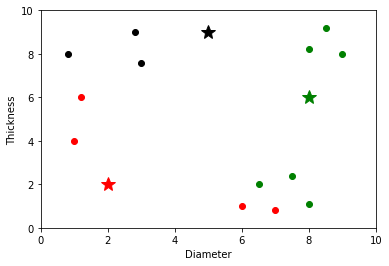

In [21]:
groups = assign_to_groups(x,c)

plt.figure()
plt.plot(x[0,groups==0],x[1,groups==0],'ro')
plt.plot(x[0,groups==1],x[1,groups==1],'go')
plt.plot(x[0,groups==2],x[1,groups==2],'ko')
plt.plot(c[0,0],c[1,0],'r*',markersize=15)
plt.plot(c[0,1],c[1,1],'g*',markersize=15)
plt.plot(c[0,2],c[1,2],'k*',markersize=15)
plt.axis([0,10,0,10])
plt.xlabel('Diameter')
plt.ylabel('Thickness')
plt.show()

We are going to be making a lot of plots, so we should make a little script to do it so we don't need to keep copy / pasting the same code!

In [22]:
def make_plots(x,c,groups,colors,label):
    # we keep plotting stuff with the same code, so let's make a little shortcut for it
    # this will plot the data points "x" and the centers "c" with the points colored according to the group
    # they are in (as listed in "groups"). The list of colors we use is "colors" and "label" lets us specify
    # which figure we are plotting in

    s = len(colors) # find out how many colors there are
    plt.figure(label) # open the figure we were told to use
    plt.clf # clear that figure
    
    for i in np.arange(s): # for every group...
        plt.figure(label) # open the correct figure
        plt.plot(x[0,groups==i],x[1,groups==i],colors[i]+'o') # plot the points in that group with circles of that color
        plt.plot(c[0,i],c[1,i],colors[i]+'*',markersize=15) # plot the center of that group with a star of that color
        plt.axis([0,10,0,10])
        plt.xlabel('Diameter')
        plt.ylabel('Thickness')
    plt.show()

We then calculate new centers as the average of each group:

In [23]:
def new_centers(x,classifiers):
    # calculates new centers given the data "x" and which class each point corresponds to (in "classifiers")
    
    s1 = np.shape(x) # find out how many dimensions each data point is
    s2 = int(np.max(classifiers)) # find out how many classes there are
    new_c = np.zeros((s1[0],s2+1)) # make a list of centers the right size
    for i in np.arange(s2+1): # for each class...
        new_c[:,i] = np.mean(x[:,classifiers==i],1) # take the mean of each data point in the class
    return new_c

[[3.8        7.91666667 2.2       ]
 [2.95       5.15       8.2       ]]


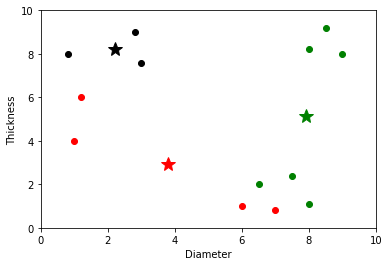

In [24]:
classes = assign_to_groups(x,c)
new_c = new_centers(x,classes)
print(new_c)

make_plots(x,new_c,classes,['r','g','k'],28)

The genius of k-means is we do this over and over and watch as the centers slowly gravitate towards separate classes! Let's see it in action:

In [25]:
def k_means_update(x,c):
    # performs a single step of k-means with data "x" and current centers guess "c"
    
    classes = assign_to_groups(x,c) # figure out which class each point is
    new_c = new_centers(x,classes) # find new centers of each class by taking the means
    return [new_c,classes]

If you run the cell once, it will update our centers one time.

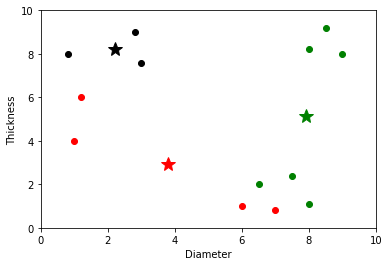

In [34]:
(new_c,classes) = k_means_update(x,c)
make_plots(x,new_c,classes,['r','g','k'],29)

If we write the function so it keeps using the new centers every time (change the "c" in the k_means_update command to "new_c") it will gravitate towards our groups!

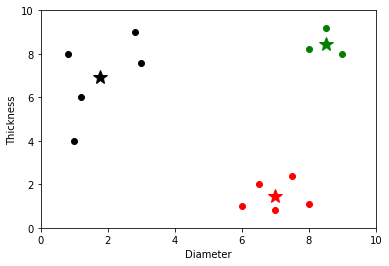

In [39]:
(new_c,classes) = k_means_update(x,new_c)
make_plots(x,new_c,classes,['r','g','k'],30)

We can automate this whole process and tell the system to stop once the centers are no longer updating!

In [28]:
def random_initial_guess(x,k):
    # a little script to make our initial guess just be random
    
    s = np.shape(x) # figure out how many dimensions the points are
    c = np.zeros((s[0],k)) # make our centers array
    for i in np.arange(s[0]): # for every dimension
        for j in np.arange(k): # and every center
            # pick a random number that is between the maximum and minimum of the data for that dimension
            c[i,j] = np.random.rand()*(np.max(x[i,:])-np.min(x[i,:])) + np.min(x[i,:])
    return c
    

def k_means(x,k,tol):
    # runs the k-means algorithm in full
    
    c = random_initial_guess(x,k) # come up with a random starting guess
    check = 1 # set the checking variable to make sure we take at least one step
    while check > tol: # as long as our checking variable is bigger than the tolerance...
        (new_c,classes) = k_means_update(x,c) # update the centers
        
        # and check how different our old centers are from our new ones!
        c_old = c
        c = new_c
        check = np.sum((c_old - c)**2)
    return [c,classes]

We can run and plot the classifying algorithm on our toy data below:

[[1.76       7.         8.5       ]
 [6.92       1.46       8.46666667]]
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 2. 2. 2.]


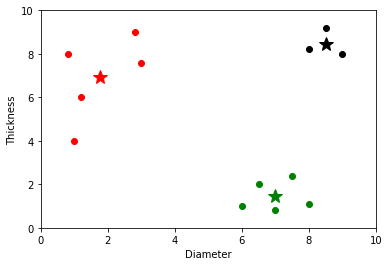

In [48]:
(final_c,final_classes) = k_means(x,3,0.01)
print(final_c)
print(final_classes)

make_plots(x,final_c,final_classes,['r','g','k'],31)

We can use k-means even if there are many more dimensions than just two! We *do* have to specify how many groups there are at the start, which can be a significant hurdle. Consider the toy movie data. We can classify each movie into k unique groups!

# Classification Project -- k-means

With k-means under our belt, we can now work on the final part of our classification project. Continue working in the same notebook where you answered the first part of the project, and answer the following.

3. Use the k-means algorithm to mathematically identify some *clusters* of data. You could find clusters of students with similar movie tastes, clusters of movies with similar features, or clusters of movies that have similar scores across the classroom. 

   (a) You **must** comment upon the choice of *k*. What value of *k* did you use and why?

   (b) Once you have found your clusters, look at which people or which movies are in each cluster. Explain in words what aspects are shared by objects in each cluster.

   (c) Produce at least one 2D plot and one 3D plot in which the different clusters are represented by different color dots and the center of each cluster is represented by a colored star. Comment upon these plots.